In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load in the data
missing_values = ["n/a", "na", "--", "-", "NA"]
payroll = pd.read_csv("../nyc_payroll/Input/city_payroll.csv", na_values = missing_values)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
payroll.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0
1,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0
2,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0
3,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0
4,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0


In [4]:
# number of instances in the original dataset which is pretty huge
payroll.shape

(3333096, 17)

In [5]:
# sample the data to make it more manageable
payroll_sample = payroll.sample(int(len(payroll) / 20))
payroll_sample.reset_index(inplace = True)

In [6]:
payroll_sample.head()

,index,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,1006584,2015,NaN,DEPT OF ED PER SESSION TEACHER,TOLEDO AKAY,NARCISA,NaN,05/01/2000,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.00,14.85,0.00,0.00,0.00
1,50904,2016,NaN,POLICE DEPARTMENT,PENA,CECILIA,NaN,07/06/2010,BROOKLYN,POLICE OFFICER,ACTIVE,78026.00,per Annum,2091.42,68530.41,208.75,10625.93,7475.94
2,1624571,2014,NaN,Police Department,WALKER,MATTHEW,G,04/30/1991,NaN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,98072.00,per Annum,2085.72,97803.42,450.50,36351.03,17029.82
3,77655,2016,NaN,ADMIN FOR CHILDREN'S SVCS,WIGGINS,ROSEMARIE,NaN,07/05/2000,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,53126.00,per Annum,363.00,13265.86,0.00,489.79,885.49
4,1188769,2014,300.0,BOARD OF ELECTION POLL WORKERS,OSBORNE,CAROL,A,01/01/2010,NaN,ELECTION TRAINER,ACTIVE,1.00,per Hour,0.00,2400.00,0.00,0.00,0.00


In [7]:
print("Original Dataset Observation Count: " + str(len(payroll)))
print("Sampled Dataset Observation Count: " + str(len(payroll_sample)))

Original Dataset Observation Count: 3333096
Sampled Dataset Observation Count: 166654


In [8]:
# save sampled dataset
payroll_sample.to_csv("../nyc_payroll/Input/city_payroll_sample.csv")

In [9]:
# number of features
payroll_sample.shape[1]

18

In [10]:
payroll_sample.head()

,index,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,1006584,2015,NaN,DEPT OF ED PER SESSION TEACHER,TOLEDO AKAY,NARCISA,NaN,05/01/2000,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.00,14.85,0.00,0.00,0.00
1,50904,2016,NaN,POLICE DEPARTMENT,PENA,CECILIA,NaN,07/06/2010,BROOKLYN,POLICE OFFICER,ACTIVE,78026.00,per Annum,2091.42,68530.41,208.75,10625.93,7475.94
2,1624571,2014,NaN,Police Department,WALKER,MATTHEW,G,04/30/1991,NaN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,98072.00,per Annum,2085.72,97803.42,450.50,36351.03,17029.82
3,77655,2016,NaN,ADMIN FOR CHILDREN'S SVCS,WIGGINS,ROSEMARIE,NaN,07/05/2000,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,53126.00,per Annum,363.00,13265.86,0.00,489.79,885.49
4,1188769,2014,300.0,BOARD OF ELECTION POLL WORKERS,OSBORNE,CAROL,A,01/01/2010,NaN,ELECTION TRAINER,ACTIVE,1.00,per Hour,0.00,2400.00,0.00,0.00,0.00


In [11]:
# printing feature names
print("Feature Names: \n\n" + "\n".join(payroll_sample.columns))

Feature Names: 

index
Fiscal Year
Payroll Number
Agency Name
Last Name
First Name
Mid Init
Agency Start Date
Work Location Borough
Title Description
Leave Status as of June 30
Base Salary
Pay Basis
Regular Hours
Regular Gross Paid
OT Hours
Total OT Paid
Total Other Pay


In [12]:
# data types
print("Datatypes: \n\n", payroll_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166654 entries, 0 to 166653
Data columns (total 18 columns):
index                         166654 non-null int64
Fiscal Year                   166654 non-null int64
Payroll Number                79452 non-null float64
Agency Name                   166654 non-null object
Last Name                     166585 non-null object
First Name                    166584 non-null object
Mid Init                      99142 non-null object
Agency Start Date             166654 non-null object
Work Location Borough         141208 non-null object
Title Description             166653 non-null object
Leave Status as of June 30    166654 non-null object
Base Salary                   166654 non-null float64
Pay Basis                     166654 non-null object
Regular Hours                 166654 non-null float64
Regular Gross Paid            166654 non-null float64
OT Hours                      166654 non-null float64
Total OT Paid                 166654 non

In [13]:
# converting Fiscal Year and Agency Start Date to Datetime64
payroll_sample["Agency Start Date"] = pd.to_datetime(payroll_sample["Agency Start Date"], errors = "coerce")
payroll_sample["Agency Name"] = payroll_sample["Agency Name"].astype(str)

print("", payroll_sample.dtypes)

 index                                  int64
Fiscal Year                            int64
Payroll Number                       float64
Agency Name                           object
Last Name                             object
First Name                            object
Mid Init                              object
Agency Start Date             datetime64[ns]
Work Location Borough                 object
Title Description                     object
Leave Status as of June 30            object
Base Salary                          float64
Pay Basis                             object
Regular Hours                        float64
Regular Gross Paid                   float64
OT Hours                             float64
Total OT Paid                        float64
Total Other Pay                      float64
dtype: object


In [14]:
# any missing values?
payroll_sample.isnull().values.any()

True

In [15]:
# total number of missing values
payroll_sample.isnull().sum().sum()

180316

In [16]:
# how many missing values per feature?
payroll_sample.isnull().sum()

index                             0
Fiscal Year                       0
Payroll Number                87202
Agency Name                       0
Last Name                        69
First Name                       70
Mid Init                      67512
Agency Start Date                16
Work Location Borough         25446
Title Description                 1
Leave Status as of June 30        0
Base Salary                       0
Pay Basis                         0
Regular Hours                     0
Regular Gross Paid                0
OT Hours                          0
Total OT Paid                     0
Total Other Pay                   0
dtype: int64

In [17]:
# percentage of missing values for each feature

values = payroll_sample.isnull().sum().sort_values(ascending=False)
percent = payroll_sample.isnull().mean().sort_values(ascending=False)
percent *= 100
missing_data = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
missing_data.head(20)

,Values,Percent
Payroll Number,87202,52.325177
Mid Init,67512,40.510279
Work Location Borough,25446,15.268760
First Name,70,0.042003
Last Name,69,0.041403
Agency Start Date,16,0.009601
Title Description,1,0.000600
Fiscal Year,0,0.000000
Agency Name,0,0.000000
Total Other Pay,0,0.000000


### Since Work Location Borough is important we'll keep it and take care of 1 observation in title description variable and keep the variable

In [18]:
# dealing or removing missing data with greater than 20 percent data missing
payroll_sample = payroll_sample.drop((missing_data[missing_data['Percent'] > 20]).index,1)
payroll_sample = payroll_sample.drop(payroll_sample.loc[payroll_sample['Title Description'].isnull()].index)
payroll_sample.isnull().sum().max()

25446

### Since First and Last names are not as important for our project we'll just drop them

In [19]:
payroll_sample = payroll_sample.drop(["First Name", "Last Name"], axis=1)

In [20]:
values = payroll_sample.isnull().sum().sort_values(ascending=False)
percent = payroll_sample.isnull().mean().sort_values(ascending=False)
percent *= 100
missing_data = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
missing_data.head()

,Values,Percent
Work Location Borough,25446,15.268852
Agency Start Date,16,0.009601
Total Other Pay,0,0.000000
Total OT Paid,0,0.000000
OT Hours,0,0.000000


In [21]:
# any missing values?
payroll_sample.isnull().values.any()

True

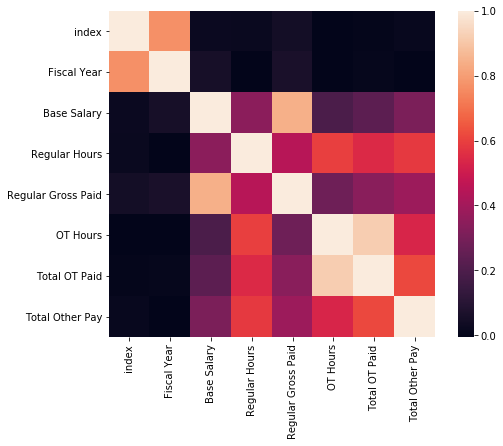

In [22]:
# correlation

corrmap = payroll_sample.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmap, vmax=1, square=True)

In [23]:
pearsoncorr = payroll_sample.corr(method='pearson')
pearsoncorr

,index,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
index,1.000000,0.771453,0.024348,0.018873,0.047387,-0.003659,0.005918,0.016552
Fiscal Year,0.771453,1.000000,0.055031,-0.003156,0.062321,-0.005545,0.008619,-0.005174
Base Salary,0.024348,0.055031,1.000000,0.347637,0.843969,0.194278,0.234960,0.310514
Regular Hours,0.018873,-0.003156,0.347637,1.000000,0.448227,0.596406,0.547197,0.585260
Regular Gross Paid,0.047387,0.062321,0.843969,0.448227,1.000000,0.279351,0.342294,0.383805
OT Hours,-0.003659,-0.005545,0.194278,0.596406,0.279351,1.000000,0.921084,0.534391
Total OT Paid,0.005918,0.008619,0.234960,0.547197,0.342294,0.921084,1.000000,0.615271
Total Other Pay,0.016552,-0.005174,0.310514,0.585260,0.383805,0.534391,0.615271,1.000000


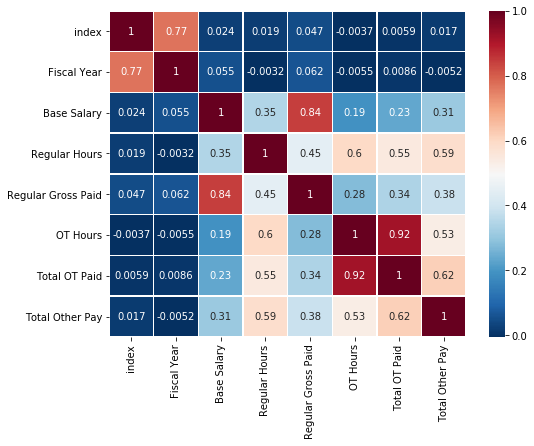

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [25]:
# to be continued...

In [26]:
# total pay of Regular Gross Paid and Total OT Paid (OT = overtime)
payroll_sample["Total Pay"] = payroll_sample["Regular Gross Paid"] + payroll_sample["Total OT Paid"]
payroll_sample.head()

,index,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Pay
0,1006584,2015,DEPT OF ED PER SESSION TEACHER,2000-05-01,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.00,14.85,0.00,0.00,0.00,14.85
1,50904,2016,POLICE DEPARTMENT,2010-07-06,BROOKLYN,POLICE OFFICER,ACTIVE,78026.00,per Annum,2091.42,68530.41,208.75,10625.93,7475.94,79156.34
2,1624571,2014,Police Department,1991-04-30,NaN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,98072.00,per Annum,2085.72,97803.42,450.50,36351.03,17029.82,134154.45
3,77655,2016,ADMIN FOR CHILDREN'S SVCS,2000-07-05,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,53126.00,per Annum,363.00,13265.86,0.00,489.79,885.49,13755.65
4,1188769,2014,BOARD OF ELECTION POLL WORKERS,2010-01-01,NaN,ELECTION TRAINER,ACTIVE,1.00,per Hour,0.00,2400.00,0.00,0.00,0.00,2400.00


(500000, 600000)

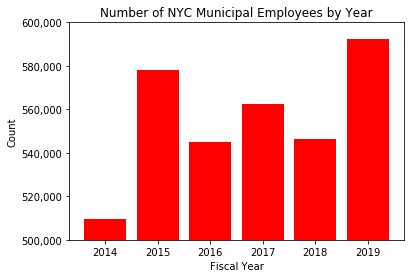

In [27]:
# counts of municipal employees (use full dataset since you're interested in purely counts)
    ## year-to-year
payroll_year_counts = payroll["Fiscal Year"].value_counts()
#plt.bar(payroll_year_counts.index, payroll_year_counts.values, color = "r")
#plt.ylim(500000, 600000) # to make the differences between each year stand out more...
#plt.title("Number of NYC Municipal Employees by Year")
#plt.xlabel("Fiscal Year")
#plt.ylabel("Count")

import matplotlib.ticker as tkr

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func) 

ax = plt.subplot(111)
ax.bar(payroll_year_counts.index, payroll_year_counts.values, color = "r")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Year")
ax.set_xlabel("Fiscal Year")
ax.set_ylabel("Count")
ax.set_ylim(500000, 600000)

Text(0, 0.5, 'Count')

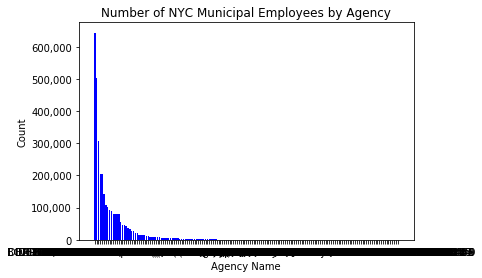

In [28]:
## agency-to-agency
    
payroll_agency_counts = payroll["Agency Name"].value_counts()
ax = plt.subplot(111)
ax.bar(payroll_agency_counts.index, payroll_agency_counts.values, color = "b")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Agency")
ax.set_xlabel("Agency Name")
ax.set_ylabel("Count")
#ax.set_ylim(500000, 600000)

In [29]:
payroll_agency_counts.head(10) #85,000 is a good cutoff

DEPT OF ED PEDAGOGICAL            643361
DEPT OF ED PER SESSION TEACHER    502848
POLICE DEPARTMENT                 307445
BOARD OF ELECTION POLL WORKERS    204209
DEPT OF ED PARA PROFESSIONALS     203906
DEPT OF ED HRLY SUPPORT STAFF     142792
FIRE DEPARTMENT                   109626
DEPT OF PARKS & RECREATION        103204
DEPARTMENT OF EDUCATION ADMIN      93067
HRA/DEPT OF SOCIAL SERVICES        89784
Name: Agency Name, dtype: int64

In [30]:
payroll_agency_counts_filter = payroll_agency_counts >= 85000
payroll_agency_counts_top = payroll_agency_counts[payroll_agency_counts_filter]
payroll_agency_counts_top

DEPT OF ED PEDAGOGICAL            643361
DEPT OF ED PER SESSION TEACHER    502848
POLICE DEPARTMENT                 307445
BOARD OF ELECTION POLL WORKERS    204209
DEPT OF ED PARA PROFESSIONALS     203906
DEPT OF ED HRLY SUPPORT STAFF     142792
FIRE DEPARTMENT                   109626
DEPT OF PARKS & RECREATION        103204
DEPARTMENT OF EDUCATION ADMIN      93067
HRA/DEPT OF SOCIAL SERVICES        89784
Name: Agency Name, dtype: int64

[Text(0, 0, 'DEPT OF ED PEDAGOGICAL'),
 Text(1, 0, 'DEPT OF ED PER SESSION TEACHER'),
 Text(2, 0, 'POLICE DEPARTMENT'),
 Text(3, 0, 'BOARD OF ELECTION POLL WORKERS'),
 Text(4, 0, 'DEPT OF ED PARA PROFESSIONALS'),
 Text(5, 0, 'DEPT OF ED HRLY SUPPORT STAFF'),
 Text(6, 0, 'FIRE DEPARTMENT'),
 Text(7, 0, 'DEPT OF PARKS & RECREATION'),
 Text(8, 0, 'DEPARTMENT OF EDUCATION ADMIN'),
 Text(9, 0, 'HRA/DEPT OF SOCIAL SERVICES')]

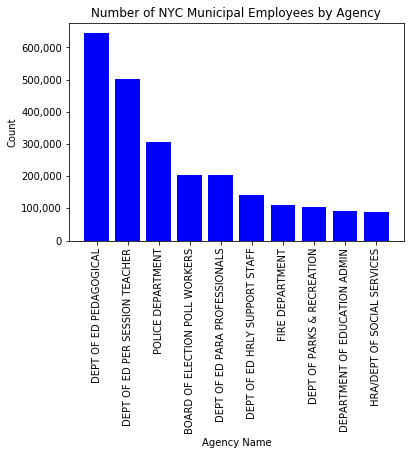

In [31]:
ax = plt.subplot(111)
ax.bar(payroll_agency_counts_top.index, payroll_agency_counts_top.values, color = "b")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Agency")
ax.set_xlabel("Agency Name")
ax.set_ylabel("Count")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(500000, 600000)

[Text(0, 0, 'MANHATTAN'),
 Text(1, 0, 'QUEENS'),
 Text(2, 0, 'BROOKLYN'),
 Text(3, 0, 'BRONX'),
 Text(4, 0, 'OTHER'),
 Text(5, 0, 'RICHMOND'),
 Text(6, 0, 'WESTCHESTER'),
 Text(7, 0, 'Manhattan'),
 Text(8, 0, 'ULSTER'),
 Text(9, 0, 'Bronx'),
 Text(10, 0, 'SULLIVAN'),
 Text(11, 0, 'Queens'),
 Text(12, 0, 'DELAWARE'),
 Text(13, 0, 'PUTNAM'),
 Text(14, 0, 'NASSAU'),
 Text(15, 0, 'SCHOHARIE'),
 Text(16, 0, 'Richmond'),
 Text(17, 0, 'DUTCHESS'),
 Text(18, 0, 'ALBANY'),
 Text(19, 0, 'GREENE'),
 Text(20, 0, 'WASHINGTON DC'),
 Text(21, 0, 'ORANGE')]

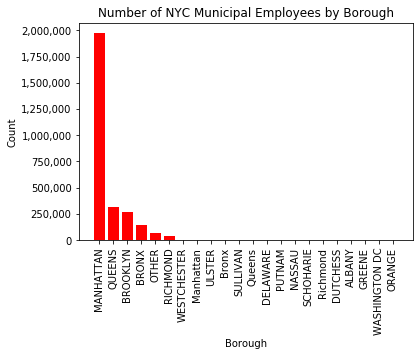

In [32]:
    ## borough-to-borough
payroll_borough_counts = payroll["Work Location Borough"].value_counts()
ax = plt.subplot(111)
ax.bar(payroll_borough_counts.index, payroll_borough_counts.values, color = "r")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Count")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# way more than five boroughs are listed here, many of them aren't even in the city 

In [33]:
payroll2 = payroll.copy()

In [34]:
# values to convert to "Other"
values = payroll2["Work Location Borough"].unique()
values = values[6:]
values = values.tolist()
values.remove("Bronx")
values.remove("Queens")
values.remove("Richmond")
values.remove("Manhattan")
values

['ALBANY',
 'DELAWARE',
 'NASSAU',
 'SULLIVAN',
 'ORANGE',
 'WESTCHESTER',
 nan,
 'ULSTER',
 'PUTNAM',
 'DUTCHESS',
 'SCHOHARIE',
 'GREENE',
 'WASHINGTON DC']

In [35]:
payroll2 = payroll2.replace("MANHATTAN", "Manhattan")
payroll2 = payroll2.replace("QUEENS", "Queens")
payroll2 = payroll2.replace("BROOKLYN", "Brooklyn")
payroll2 = payroll2.replace("BRONX", "Bronx")
payroll2 = payroll2.replace("RICHMOND", "Staten Island")
payroll2 = payroll2.replace("Richmond", "Staten Island")
payroll2 = payroll2.replace(values, "Other")
payroll2 = payroll2.replace("OTHER", "Other")

In [36]:
payroll2["Work Location Borough"].value_counts() # despite not looking like much at a first glance, the amount of
                                                 # NYC municipal employees that work outside the city is extremely
                                                 # significant

Manhattan        1975275
Other             584295
Queens            314935
Brooklyn          270118
Bronx             150130
Staten Island      38343
Name: Work Location Borough, dtype: int64

[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Other'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Brooklyn'),
 Text(4, 0, 'Bronx'),
 Text(5, 0, 'Staten Island')]

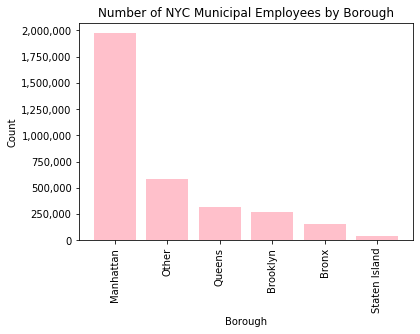

In [37]:
    ## revised borough-to-borough
payroll_borough_counts = payroll2["Work Location Borough"].value_counts()
ax = plt.subplot(111)
ax.bar(payroll_borough_counts.index, payroll_borough_counts.values, color = "pink")
ax.yaxis.set_major_formatter(y_format)
ax.set_title("Number of NYC Municipal Employees by Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Count")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [38]:
payroll["Borough"] = payroll2["Work Location Borough"] # add the altered boroughs to the original dataset

Text(0, 0.5, 'Frequency')

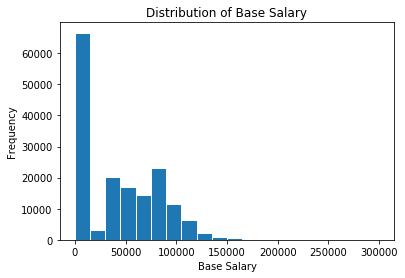

In [39]:
# distributions of base pay
payroll_sample["Base Salary"].hist(grid = False, edgecolor = "white", bins = 20)
plt.title("Distribution of Base Salary")
plt.xlabel("Base Salary")
plt.ylabel("Frequency")

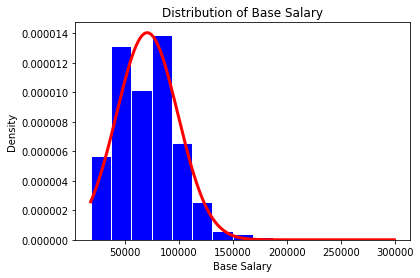

In [40]:

paid_filter = payroll_sample["Base Salary"] > 18000
paid_payroll_sample = payroll_sample[paid_filter]

paid_payroll_sample["Base Salary"].hist(grid = False, edgecolor = "white", bins = 15, density = True, color = "blue")
plt.title("Distribution of Base Salary")
plt.xlabel("Base Salary")
plt.ylabel("Density")

import numpy as np
import scipy.stats as stats
x = np.arange(paid_payroll_sample["Base Salary"].min(), paid_payroll_sample["Base Salary"].max(), 1000)
y = stats.norm.pdf(x, loc = paid_payroll_sample["Base Salary"].mean(), scale = paid_payroll_sample["Base Salary"].std())
plt.plot(x,y, color = "red", linewidth = 3)

In [41]:
print("After you filter out the employees with lower salaries, the distribution of base salary roughly resembles")
print("N(" + str(round(paid_payroll_sample["Base Salary"].mean(), 2)) + ", " + str(round(paid_payroll_sample["Base Salary"].std(), 2)) + ").")

After you filter out the employees with lower salaries, the distribution of base salary roughly resembles
N(70636.02, 28406.76).


In [88]:
base_salary_means = []
for i in range(10000): 
    sample = payroll_sample["Base Salary"].sample(len(payroll_sample["Base Salary"]), replace = True) 
    sample_mean = sample.mean()
    base_salary_means.append(sample_mean)

Text(0, 0.5, 'Frequency')

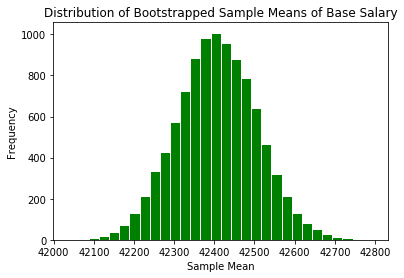

In [89]:
base_salary_means = pd.Series(base_salary_means)
base_salary_means.hist(bins = 30, edgecolor = "white", grid = False, color = "g", )
plt.title("Distribution of Bootstrapped Sample Means of Base Salary")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

In [92]:
low = base_salary_means.quantile(0.025)
high = base_salary_means.quantile(0.975)
print("The 95% Confidence Interval of Base Salary is $" + str(round(low, 2)) + " - $" + str(round(high, 2)))
print("With such a small confidence interval, one can conclude that the average NYC municipal employee has a base salary of ~$42,000.")

The 95% Confidence Interval of Base Salary is $42211.0 - $42602.44
With such a small confidence interval, one can conclude that the average NYC municipal employee has a base salary of ~$42,000.


In [102]:
print("Median Base Salary: $" + str(payroll_sample["Base Salary"].median()))

Median Base Salary: $41069.0


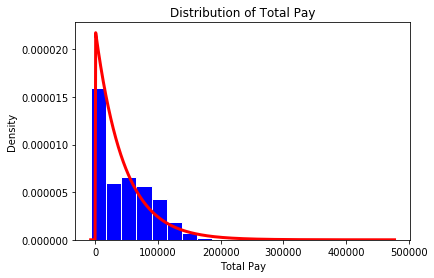

In [191]:
# distributions of total pay
payroll_sample["Total Pay"].hist(grid = False, edgecolor = "white", bins = 20, density = True, color = "b")
plt.title("Distribution of Total Pay")
plt.xlabel("Total Pay")
plt.ylabel("Density")

x = np.arange(payroll_sample["Total Pay"].min(), payroll_sample["Total Pay"].max(), 1000)
y = stats.expon.pdf(x, scale = payroll_sample["Total Pay"].mean())
plt.plot(x,y, color = "red", linewidth = 3)

In [77]:
1 / payroll_sample["Total Pay"].mean()

2.2224433177292497e-05

In [81]:
print("The distribution of total pay roughly resembles" + " E(" + str(round((1 / payroll_sample["Total Pay"].mean()), 8)) + ")")

The distribution of total pay roughly resembles E(2.222e-05)


In [84]:
total_pay_means = []
for i in range(10000): 
    sample = payroll_sample["Total Pay"].sample(len(payroll_sample["Total Pay"]), replace = True) 
    sample_mean = sample.mean()
    total_pay_means.append(sample_mean)

Text(0, 0.5, 'Frequency')

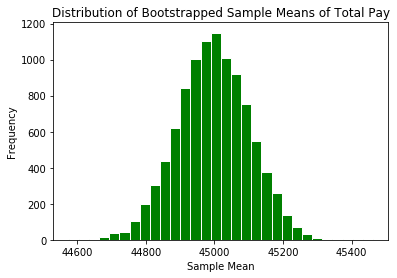

In [85]:
total_pay_means = pd.Series(total_pay_means)
total_pay_means.hist(bins = 30, edgecolor = "white", grid = False, color = "g", )
plt.title("Distribution of Bootstrapped Sample Means of Total Pay")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

In [96]:
low = total_pay_means.quantile(0.025)
high = total_pay_means.quantile(0.975)
print("The 95% Confidence Interval of Total Pay is $" + str(round(low, 2)) + " - $" + str(round(high, 2)))
print("With such a small confidence interval, one can conclude that the average NYC municipal employee has\na total pay of ~$45000.")

The 95% Confidence Interval of Total Pay is $44789.61 - $45198.51
With such a small confidence interval, one can conclude that the average NYC municipal employee has
a total pay of ~$45000.


In [101]:
print("Median Total Pay: $" + str(payroll_sample["Total Pay"].median()))

Median Total Pay: $37171.02


In [93]:
print("It's important to note that there is no overlap between the base salary 95% confidence interval and the")
print("total pay 95% confidence interval").

It's important to note that there is no overlap between the base salary 95% confidence interval and the
total pay 95% confidence interval


In [103]:
print("It's also important to note that despite the mean total pay being expectedly higher than the mean base salary pay,")
print("the median total pay is unexpectedly lower than the median base salary...")

It's also important to note that despite the mean total pay being expectedly higher than the mean base salary pay,
the median total pay is unexpectedly lower than the median base salary...


In [111]:
# one-way ANOVA on base pay by borough 
    ## Statistical Test: One-Way ANOVA
    ## NULL HYPOTHESIS: The base pay means are equal across boroughs.
    ## ALTERNATE HYPTHESIS: The base pay means differ across boroughs.

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [169]:
payroll["Total Pay"] = payroll["Regular Gross Paid"] + payroll["Total OT Paid"]

In [170]:
manhattan_filter = payroll["Borough"] == "Manhattan"
manhattan_payroll = payroll[manhattan_filter]
manhattan_base_pay = manhattan_payroll["Base Salary"]

In [171]:
other_filter = payroll["Borough"] == "Other"
other_payroll = payroll[other_filter]
other_base_pay = other_payroll["Base Salary"]

In [172]:
queens_filter = payroll["Borough"] == "Queens"
queens_payroll = payroll[queens_filter]
queens_base_pay = queens_payroll["Base Salary"]

In [173]:
brooklyn_filter = payroll["Borough"] == "Brooklyn"
brooklyn_payroll = payroll[brooklyn_filter]
brooklyn_base_pay = brooklyn_payroll["Base Salary"]

In [174]:
bronx_filter = payroll["Borough"] == "Bronx"
bronx_payroll = payroll[bronx_filter]
bronx_base_pay = bronx_payroll["Base Salary"]

In [175]:
staten_island_filter = payroll["Borough"] == "Staten Island"
staten_island_payroll = payroll[staten_island_filter]
staten_island_base_pay = staten_island_payroll["Base Salary"]

In [130]:
manhattan_base_pay = manhattan_base_pay.reset_index()["Base Salary"]
other_base_pay = other_base_pay.reset_index()["Base Salary"]
queens_base_pay = queens_base_pay.reset_index()["Base Salary"]
brooklyn_base_pay = brooklyn_base_pay.reset_index()["Base Salary"]
bronx_base_pay = bronx_base_pay.reset_index()["Base Salary"]
staten_island_base_pay = staten_island_base_pay.reset_index()["Base Salary"]

In [131]:
frame = {"Manhattan": manhattan_base_pay, "Other": other_base_pay, "Queens": queens_base_pay, "Brooklyn": brooklyn_base_pay, "Bronx": bronx_base_pay, "Staten Island": staten_island_base_pay}

In [132]:
base_pay = pd.DataFrame(frame)
base_pay.head()

,Manhattan,Other,Queens,Brooklyn,Bronx,Staten Island
0,47678.0,126199.0,90822.00,48566.0,78026.0,13.83
1,119959.0,166460.0,78026.00,103585.0,118902.0,54490.00
2,39966.0,39841.0,11.79,42819.0,26536.0,73343.00
3,116000.0,101764.0,111292.00,39882.0,56395.0,88968.00
4,1.0,170000.0,57920.00,118902.0,64900.0,71843.00


In [134]:
base_pay_melt = pd.melt(base_pay.reset_index(), id_vars=['index'], value_vars=["Manhattan", "Other", "Queens", "Brooklyn", "Bronx", "Staten Island"])
base_pay_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=base_pay_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.043020e+14,5.0,12713.042734,0.0
Residual,5.469156e+15,3333090.0,NaN,NaN


In [156]:
r_squared = 100 * 1.043020e+14 / (1.043020e+14 + 5.469156e+15)

In [143]:
df1 = 6 - 1
df_total = len(manhattan_base_pay) + len(other_base_pay) + len(queens_base_pay) + len(brooklyn_base_pay)+ len(bronx_base_pay) + len(staten_island_base_pay)
df_total = df_total - 1 
df2 = df_total - df1

In [162]:
print("Due to the large population size, it's not necessary to check the one-way ANOVA assumptions of normality and equal variation")
print("Strong evidence of heterogeneity in base salary was present among the boroughs (F(" + str(df1) + ", " + str(df2) +"), p < 0.01, ANOVA)")
print("However, it's important to note the low R-Squared = " + str(round(r_squared, 2)) + "%")
print("The one-way ANOVA model only explains " + str(round(r_squared, 2)) + "% of the variation in base pay")

Due to the large population size, it's not necessary to check the one-way ANOVA assumptions of normality and equal variation
Strong evidence of heterogeneity in base salary was present among the boroughs (F(5, 3333090), p < 0.01, ANOVA)
However, it's important to note the low R-Squared = 1.87%
The one-way ANOVA model only explains 1.87% of the variation in base pay


In [47]:
# one-way ANOVA on actual pay by borough 
    ## Statistical Test: One-Way ANOVA
    ## NULL HYPOTHESIS: The actual pay means are equal across boroughs.
    ## ALTERNATE HYPTHESIS: The actual pay means differ across boroughs.

In [164]:
manhattan_payroll.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Borough
0,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0,Manhattan
1,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0,Manhattan
2,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0,Manhattan
3,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0,Manhattan
4,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0,Manhattan


In [176]:
manhattan_total_pay = manhattan_payroll["Total Pay"]
other_total_pay = other_payroll["Total Pay"]
queens_total_pay = queens_payroll["Total Pay"]
brooklyn_total_pay = brooklyn_payroll["Total Pay"]
bronx_total_pay = bronx_payroll["Total Pay"]
staten_island_total_pay = staten_island_payroll["Total Pay"]

In [178]:
manhattan_total_pay = manhattan_total_pay.reset_index()["Total Pay"]
other_total_pay = other_total_pay.reset_index()["Total Pay"]
queens_total_pay = queens_total_pay.reset_index()["Total Pay"]
brooklyn_total_pay = brooklyn_total_pay.reset_index()["Total Pay"]
bronx_total_pay = bronx_total_pay.reset_index()["Total Pay"]
staten_island_total_pay = staten_island_total_pay.reset_index()["Total Pay"]

In [180]:
frame = {"Manhattan": manhattan_total_pay, "Other": other_total_pay, "Queens": queens_total_pay, "Brooklyn": brooklyn_total_pay, "Bronx": bronx_total_pay, "Staten Island": staten_island_total_pay}

In [181]:
total_pay = pd.DataFrame(frame)
total_pay.head()

,Manhattan,Other,Queens,Brooklyn,Bronx,Staten Island
0,47223.31,124410.82,123430.57,48042.47,104755.26,16495.53
1,119042.50,128540.70,97265.84,118646.85,178850.00,49073.70
2,27473.96,40413.06,1880.51,41152.48,27557.90,75913.97
3,115104.57,88936.68,19647.83,47678.30,57685.20,76112.89
4,3500.00,23409.61,76360.89,140233.72,66857.98,77942.30


In [182]:
total_pay_melt = pd.melt(total_pay.reset_index(), id_vars=['index'], value_vars=["Manhattan", "Other", "Queens", "Brooklyn", "Bronx", "Staten Island"])
total_pay_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=total_pay_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),2.543818e+14,5.0,29310.282928,0.0
Residual,5.785528e+15,3333090.0,NaN,NaN


In [183]:
r_squared = 100 * 2.543818e+14 / (2.543818e+14 + 5.785528e+15)

In [184]:
df1 = 6 - 1
df_total = len(manhattan_total_pay) + len(other_total_pay) + len(queens_total_pay) + len(brooklyn_total_pay)+ len(bronx_total_pay) + len(staten_island_total_pay)
df_total = df_total - 1 
df2 = df_total - df1

In [187]:
print("Due to the large population size, it's not necessary to check the one-way ANOVA assumptions of normality and equal variation")
print("Strong evidence of heterogeneity in total pay was present among the boroughs (F(" + str(df1) + ", " + str(df2) +"), p < 0.01, ANOVA)")
print("However, it's important to note the low R-Squared = " + str(round(r_squared, 2)) + "%")
print("The one-way ANOVA model only explains " + str(round(r_squared, 2)) + "% of the variation in total pay")

Due to the large population size, it's not necessary to check the one-way ANOVA assumptions of normality and equal variation
Strong evidence of heterogeneity in total pay was present among the boroughs (F(5, 3333090), p < 0.01, ANOVA)
However, it's important to note the low R-Squared = 4.21%
The one-way ANOVA model only explains 4.21% of the variation in total pay


In [188]:
payroll_sample.head()

,index,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Pay
0,1006584,2015,DEPT OF ED PER SESSION TEACHER,2000-05-01,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.00,14.85,0.00,0.00,0.00,14.85
1,50904,2016,POLICE DEPARTMENT,2010-07-06,BROOKLYN,POLICE OFFICER,ACTIVE,78026.00,per Annum,2091.42,68530.41,208.75,10625.93,7475.94,79156.34
2,1624571,2014,Police Department,1991-04-30,NaN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,98072.00,per Annum,2085.72,97803.42,450.50,36351.03,17029.82,134154.45
3,77655,2016,ADMIN FOR CHILDREN'S SVCS,2000-07-05,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,53126.00,per Annum,363.00,13265.86,0.00,489.79,885.49,13755.65
4,1188769,2014,BOARD OF ELECTION POLL WORKERS,2010-01-01,NaN,ELECTION TRAINER,ACTIVE,1.00,per Hour,0.00,2400.00,0.00,0.00,0.00,2400.00


Text(0, 0.5, 'Density')

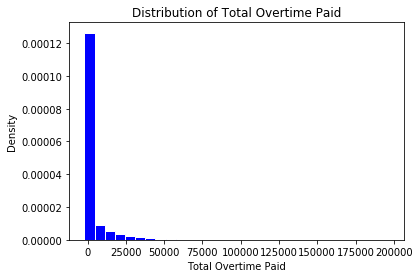

In [195]:
# distributions of overtime
payroll_sample["Total OT Paid"].hist(grid = False, edgecolor = "white", bins = 30, density = True, color = "b")
plt.title("Distribution of Total Overtime Paid")
plt.xlabel("Total Overtime Paid")
plt.ylabel("Density")

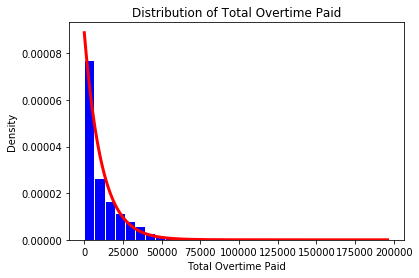

In [196]:
ot_paid_filter = payroll_sample["Total OT Paid"] > 0
ot_paid_payroll_sample = payroll_sample[ot_paid_filter]
ot_paid_payroll_sample["Total OT Paid"].hist(grid = False, edgecolor = "white", bins = 30, density = True, color = "b")
plt.title("Distribution of Total Overtime Paid")
plt.xlabel("Total Overtime Paid")
plt.ylabel("Density")

x = np.arange(ot_paid_payroll_sample["Total OT Paid"].min(), ot_paid_payroll_sample["Total OT Paid"].max(), 1000)
y = stats.expon.pdf(x, scale = ot_paid_payroll_sample["Total OT Paid"].mean())
plt.plot(x,y, color = "red", linewidth = 3)

In [201]:
print("There are many employees with no to little overtime pay but there are quite a few outliers that make upwards to $200,000 in overtime pay")
print("The distribition of total overtime paid to employees that have worked overtime closely resemble E(" + str(round(1 / ot_paid_payroll_sample["Total OT Paid"].mean(), 8)) + ")")

There are many employees with no to little overtime pay but there are quite a few outliers that make upwards to $200,000 in overtime pay
The distribition of total overtime paid to employees that have worked overtime closely resemble E(8.889e-05)


Text(0, 0.5, 'Total Pay')

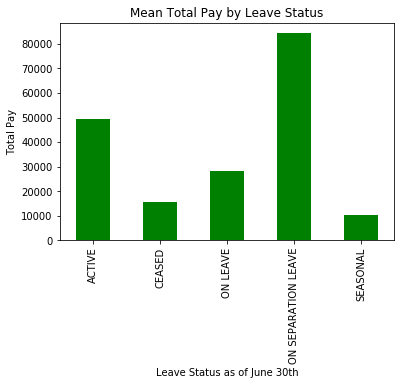

In [208]:
# bar graph of the pay of active,ceased, on-leave, on-seperation leave, seasonal employees
payroll_sample.groupby("Leave Status as of June 30").mean()["Total Pay"].plot.bar(color = "g")
plt.title("Mean Total Pay by Leave Status")
plt.xlabel("Leave Status as of June 30th")
plt.ylabel("Total Pay")

Text(0, 0.5, 'Total Pay')

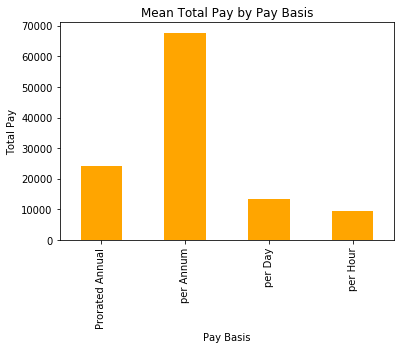

In [210]:
# bar graph of the pay of by pay basis
payroll_sample.groupby("Pay Basis").mean()["Total Pay"].plot.bar(color = "orange")
plt.title("Mean Total Pay by Pay Basis")
plt.xlabel("Pay Basis")
plt.ylabel("Total Pay")

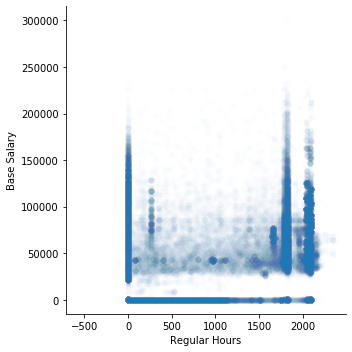

In [214]:
# regular hours vs. base salary scatterplot
# payroll_sample2 = payroll.sample(200)
sns.relplot(x = "Regular Hours", y = "Base Salary", data = payroll_sample, alpha = 0.01)

There appears to be little to no correlation between regular hours and base salary...


In [217]:
# Pearson's R for regular hours vs base salary
import scipy
scipy.stats.pearsonr(payroll_sample["Regular Hours"], payroll_sample["Base Salary"])

(0.3476372446090982, 0.0)

In [218]:
print("There appears to be little to no correlation between regular hours and base salary.")

There appears to be little to no correlation between regular hours and base salary.


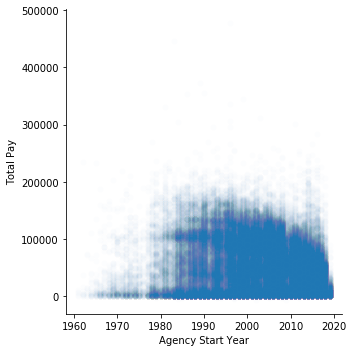

In [225]:
# agency start date vs. actual pay scatterplot
from datetime import datetime
payroll_sample["Agency Start Year"] = payroll_sample["Agency Start Date"].dt.year
post_1960_filter = payroll_sample["Agency Start Year"] > 1960 
sns.relplot(x = "Agency Start Year", y = "Total Pay", data = payroll_sample[post_1960_filter], alpha = 0.01)

In [230]:
payroll_sample2 = payroll_sample.dropna()
payroll_sample2["Agency Start Year"] = payroll_sample2["Agency Start Year"].astype(int)
scipy.stats.pearsonr(payroll_sample2["Agency Start Year"], payroll_sample2["Total Pay"])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(-0.24174468190451265, 0.0)

In [231]:
print("There appears to be little to no correlation between agency start date and total pay.")

There appears to be little to no correlation between agency start date and total pay.


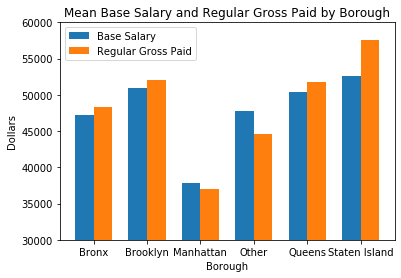

In [259]:
# double bar graph of base salary and regular gross paid by borough

ind = np.arange(6)  # the x locations for the groups
width = 0.35  # the width of the bars
plt.bar(ind - width/2, payroll.groupby("Borough").mean()["Base Salary"].values, width)
plt.bar(ind + width/2, payroll.groupby("Borough").mean()["Regular Gross Paid"].values, width)
plt.ylim(30000, 60000)
plt.title("Mean Base Salary and Regular Gross Paid by Borough")
plt.xlabel("Borough")
plt.ylabel("Dollars")
plt.xticks(ind, ("Bronx","Brooklyn","Manhattan","Other","Queens","Staten Island"))
plt.legend(["Base Salary", "Regular Gross Paid"], loc=2)

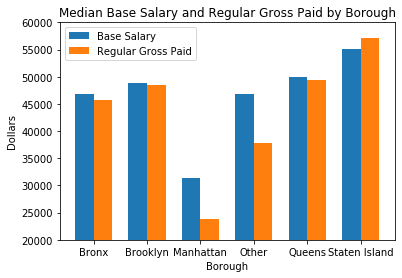

In [261]:
# double bar graph of base salary and regular gross paid by borough

ind = np.arange(6)  # the x locations for the groups
width = 0.35  # the width of the bars
plt.bar(ind - width/2, payroll.groupby("Borough").median()["Base Salary"].values, width)
plt.bar(ind + width/2, payroll.groupby("Borough").median()["Regular Gross Paid"].values, width)
plt.ylim(20000, 60000)
plt.title("Median Base Salary and Regular Gross Paid by Borough")
plt.xlabel("Borough")
plt.ylabel("Dollars")
plt.xticks(ind, ("Bronx","Brooklyn","Manhattan","Other","Queens","Staten Island"))
plt.legend(["Base Salary", "Regular Gross Paid"], loc=2)

In [262]:
print("Interestingly enough, Manhattan employees are paid the least on average and Staten Island employees are paid the most on average...")

Interestingly enough, Manhattan employees are paid the least and Staten Island employees are paid the most...


In [270]:
# swarm plot of borough vs. regular gross paid 
payroll_sample4 = payroll.sample(n = 10000)

In [274]:
payroll_sample4.groupby("Borough").mean()["Regular Gross Paid"]

Borough
Bronx            47789.529953
Brooklyn         55594.094303
Manhattan        37411.713440
Other            43954.441493
Queens           51119.853709
Staten Island    63450.763077
Name: Regular Gross Paid, dtype: float64

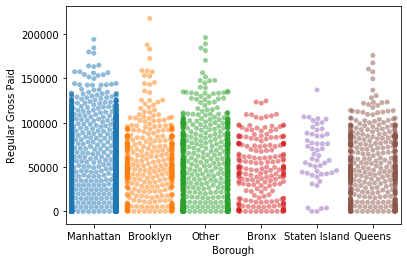

In [273]:
sns.swarmplot(x = "Borough", y = "Regular Gross Paid", data = payroll_sample4, alpha = 0.50)

In [276]:
print("It seems that many of the highest paid employees work in Manhattan but the borough's many low-paid employees")
print("drag the average pay down")

It seems that many of the highest paid employees work in Manhattan but the borough's many low-paid employees
drag the average pay down


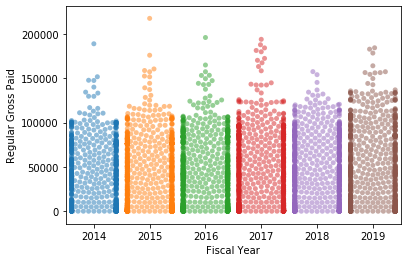

In [277]:
# swarm plot of fiscal year vs. regular gross paid
sns.swarmplot(x = "Fiscal Year", y = "Regular Gross Paid", data = payroll_sample4, alpha = 0.50)

In [278]:
print("Nothing realy of note...")

Nothing realy of note...


Text(0.5, 1, 'Total Hours vs. Regular Gross Paid')

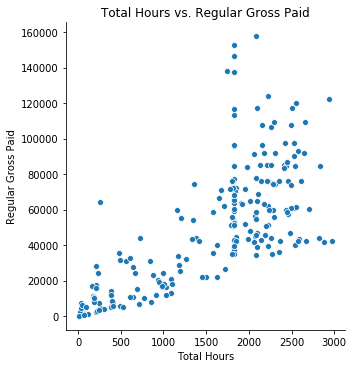

In [286]:
# total hours (regular hours + OT Hours) vs regular gross paid
payroll_sample5 = payroll.sample(500)
payroll_sample5["Total Hours"] = payroll_sample5["Regular Hours"] + payroll_sample5["OT Hours"]
total_hour_filter = payroll_sample5["Total Hours"] > 0
sns.relplot(x = "Total Hours", y = "Regular Gross Paid", data = payroll_sample5[total_hour_filter])
plt.title("Total Hours vs. Regular Gross Paid")

In [292]:
print(scipy.stats.pearsonr(payroll_sample["Regular Hours"], payroll_sample["OT Hours"]))

(0.5964055008919729, 0.0)


In [294]:
print("There appears to be positive correlation between total hours worked and pay.")

There appears to be positive correlation between total hours worked and pay.


In [309]:
payroll_sample2 = payroll.sample(int(len(payroll) / 20))
payroll_sample2.reset_index(inplace = True)

In [297]:
payroll_sample2.head()

,index,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Borough,Total Pay
0,2718707,2018,56.0,POLICE DEPARTMENT,ROSERO,JOAO,F,07/06/2010,QUEENS,POLICE OFFICER,ACTIVE,85292.0,per Annum,2045.72,85058.22,355.83,25905.47,18363.13,Queens,110963.69
1,722481,2015,NaN,DEPARTMENT OF SANITATION,TAMBURRI,JASON,L,09/10/2007,BROOKLYN,SANITATION WORKER,ACTIVE,72153.0,per Annum,2051.72,67944.07,225.00,10671.47,8925.44,Brooklyn,78615.54
2,2770816,2019,67.0,ADMIN FOR CHILDREN'S SVCS,WILDY,CHERYL,NaN,10/17/2016,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,57070.0,per Annum,1825.00,57364.76,637.75,26962.03,946.41,Bronx,84326.79
3,1336371,2014,742.0,DEPT OF ED PEDAGOGICAL,GRZYBINSKI,VANESSA,W,08/28/2008,NaN,TEACHER,ACTIVE,54128.0,per Annum,0.00,52289.27,0.00,0.00,1000.00,Other,52289.27
4,2356326,2018,742.0,DEPT OF ED PEDAGOGICAL,CASTILLO SIEGEL,ROCIO,NaN,09/05/1990,OTHER,TEACHER,ACTIVE,112434.0,per Annum,0.00,107547.34,0.00,0.00,0.00,Other,107547.34


In [310]:
regular_gross_paid = payroll_sample2["Regular Gross Paid"]
payroll_sample2 = payroll_sample2[["Fiscal Year", "Borough", "Leave Status as of June 30", "Base Salary", "Pay Basis"]]

In [311]:
payroll_sample2_dummies = pd.get_dummies(payroll_sample2, columns = ["Borough", "Leave Status as of June 30", "Pay Basis"])
payroll_sample2_dummies.head()

,Fiscal Year,Base Salary,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Other,Borough_Queens,Borough_Staten Island,Leave Status as of June 30_ACTIVE,Leave Status as of June 30_CEASED,Leave Status as of June 30_ON LEAVE,Leave Status as of June 30_ON SEPARATION LEAVE,Leave Status as of June 30_SEASONAL,Pay Basis_Prorated Annual,Pay Basis_per Annum,Pay Basis_per Day,Pay Basis_per Hour
0,2018,85292.00,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2017,33.18,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2016,10.35,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,2014,1.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,2017,97133.00,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [312]:
# K-Nearest Neighbor Regressor with k = 5 to predict regular gross paid
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
    # create a 80/20 train-test split and utilize a k-nearest neighbor algorithm
X_train, X_test, y_train, y_test = train_test_split(payroll_sample2_dummies, regular_gross_paid, test_size = 0.2)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

k5nn = KNeighborsRegressor(n_neighbors = 5)
k5nn.fit(X_train_scaled, y_train)
y_pred = k5nn.predict(X_test_scaled)

200106328.55831534

In [314]:
        # compute mse and rmse
mse = ((y_test - y_pred)**2).mean()
import math 
rmse = math.sqrt(mse)
print("MSE: " + str(mse))
print("RMSE: " + str(rmse))

MSE: 200106328.55831534
RMSE: 14145.894406445826


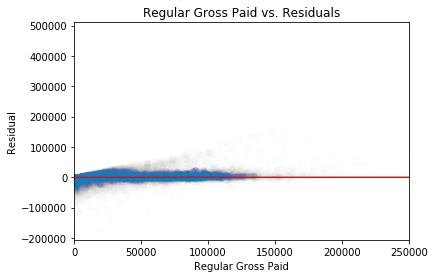

In [324]:
    # regular gross paid vs residuals 
resid = y_test - y_pred
plt.scatter(y_test, resid, alpha = 0.005)
plt.xlabel("Regular Gross Paid")
plt.ylabel("Residual")
plt.title("Regular Gross Paid vs. Residuals")
plt.xlim(0, 250000)
x = np.arange(0,250000)
y = np.tile(0, len(x))
plt.plot(x,y, color = 'r')